In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy.stats import sem

%matplotlib inline
%config Completer.use_jedi = False


#import required sklearn for logistic regression classifier

import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix,roc_auc_score, f1_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, RepeatedKFold, cross_validate
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
#Load the filtered isoform switch file and the file containing all genes for BRCA
#Only matched samples / files used

isoform_switch_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/Survival/BRCA_isoform_survival.csv'
all_genes_file = '/Users/jake/OneDrive - University of Glasgow/Project/BRCA/Survival/BRCA_all_genes_survival.csv'

isoform_survival = pd.read_csv(isoform_switch_file,header=[0,1],sep='\t',index_col=[0])
all_genes_survival = pd.read_csv(all_genes_file,header=[0,1],sep='\t',index_col=[0])

In [3]:
isoform_survival

Gene_symbol,TANK,RBCK1,CASC4,DUT,TMEM201,FBLN2,ABLIM3,MPRIP,MCF2L,EHBP1,...,ADAMTS12,PCGF5,REPS1,CCND3,LRRFIP2,ZRANB2,H2AFV,CEP104,SLK,Three_year_status
Gene_ensembl_id,ENSG00000136560,ENSG00000125826,ENSG00000166734,ENSG00000128951,ENSG00000188807,ENSG00000163520,ENSG00000173210,ENSG00000133030,ENSG00000126217,ENSG00000115504,...,ENSG00000151388,ENSG00000180628,ENSG00000135597,ENSG00000112576,ENSG00000093167,ENSG00000132485,ENSG00000105968,ENSG00000116198,ENSG00000065613,Three_year_status
TCGA-BH-A1FN,15.343920,16.896624,16.751647,9.053910,3.469054,18.969059,2.182001,6.682397,1.918617,7.225800,...,7.858756,4.875201,13.634318,9.727431,4.229633,25.029257,31.033869,6.468174,35.239420,1
TCGA-E9-A1NG,8.204818,15.724169,30.831324,9.540387,1.458159,41.826503,7.087709,9.316663,1.614837,7.243868,...,13.075343,7.006416,4.295827,10.860205,6.456335,11.036110,25.771819,5.205502,15.373430,0
TCGA-AR-A5QQ,4.584809,37.413581,7.432917,31.326441,3.784303,26.942907,4.418783,5.318138,0.278765,8.252696,...,3.191489,2.414725,5.561334,21.714776,7.972584,11.563606,32.334497,4.179797,14.306222,0
TCGA-AR-A24L,12.187805,11.817051,42.466447,17.772046,1.528907,29.601257,5.565343,7.070899,1.737580,6.467532,...,18.151597,8.583196,4.694506,10.228295,5.355158,17.109764,40.169837,5.040365,14.045827,1
TCGA-AC-A23H,10.839375,17.725220,17.908471,10.923948,2.476160,19.744676,5.266147,4.993341,1.905335,4.650695,...,8.015156,3.409479,4.394309,8.867406,5.226943,13.281163,34.015799,6.835127,11.712936,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AR-A2LH,9.579705,23.338886,20.126391,23.172247,3.533242,32.862378,3.116353,7.454451,1.688323,3.913063,...,1.487765,5.793914,4.752568,24.878755,3.930242,12.494149,32.978206,5.631005,15.788019,0
TCGA-B6-A0IN,5.653001,12.949612,13.825296,9.798449,1.953969,22.035637,4.326962,5.437337,1.373668,3.379278,...,3.018018,3.847809,2.247135,13.729128,2.975186,8.600656,39.169583,2.867297,4.809616,1
TCGA-B6-A0IK,6.527808,11.453830,16.448324,19.178110,3.168995,13.938611,4.866697,4.597985,2.722875,3.955684,...,2.511905,3.526115,4.455779,10.806836,5.182330,12.908030,52.973266,5.113113,5.495684,0


In [4]:
#Check isoform_switch for and missing data

isoform_survival.isnull().sum().unique()

array([0])

In [5]:
#Check all genes file for missing data

all_genes_survival.isnull().sum().sort_values(ascending = False)
all_genes_survival.isnull().sum().unique()


array([0])

In [6]:
#Check three year survival ratio ... since almost equal will not use 'class_weight' in model

survival_ratio = sum(isoform_survival['Three_year_status','Three_year_status']==1) / sum(isoform_survival['Three_year_status','Three_year_status']==0)
survival_ratio

1.1549295774647887

In [7]:
#Do an initial train test split to extract an 'unseen' test set of data (30%) for both isoform and all genes
#Set stratify as y to keep same ratio in test data

X_full_iso = isoform_survival.drop('Three_year_status',axis=1,level=0)
y_full_iso = isoform_survival['Three_year_status','Three_year_status']

X_develop_iso, X_test_iso, y_develop_iso, y_test_iso = train_test_split(X_full_iso, y_full_iso, test_size=0.3, random_state=1,stratify=y_full_iso)


In [8]:
#Repeat for all genes .. using random sample of same number of genes as isoform

X_full_all = all_genes_survival.drop('Three_year_status',axis=1,level=0)
y_full_all = all_genes_survival['Three_year_status','Three_year_status']

#Take a random sample of genes 5 seperate times .. use X_full_iso.columns to acquire same num of genes as isoform
X_random_1 = X_full_all.sample(n=len(X_full_iso.columns),axis=1)
X_random_2 = X_full_all.sample(n=len(X_full_iso.columns),axis=1)
X_random_3 = X_full_all.sample(n=len(X_full_iso.columns),axis=1)

#Change random state for each 
X_develop_ran_1, X_test_ran_1, y_develop_ran_1, y_test_ran_1 = train_test_split(X_random_1, y_full_all, test_size=0.3, random_state=1,stratify=y_full_all)
X_develop_ran_2, X_test_ran_2, y_develop_ran_2, y_test_ran_2 = train_test_split(X_random_2, y_full_all, test_size=0.3, random_state=2,stratify=y_full_all)
X_develop_ran_3, X_test_ran_3, y_develop_ran_3, y_test_ran_3 = train_test_split(X_random_3, y_full_all, test_size=0.3, random_state=3,stratify=y_full_all)



In [9]:
#First do simple Logistic Regression with gridsearch to determine optimal parameters

def grid_search_LR(X,y):
    '''Perform logistic regression grid search. Supply development X and y data.'''

    #Logistic Regression with dual = False since n_samples > n_features
    classifier = LogisticRegression(dual=False)
    
    #Want to add PCA to pipeline
    pca = PCA(n_components=10)

    #Pipeline containing Log Reg classifier and Log Reg with deafault settings for feature engineering
    #Also added scaler as error related to iterations / convergance appears, which can be due to 'poor scaling'
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',pca),
                                  ('feature_selection', SelectFromModel(LogisticRegression(dual=False))),
                                  ('classifier',classifier)])


    #Two dictionaries of potential potential parameters to account for penalties and solvers that can/can't go togther
    #The PCA searches from 1 upto max number of features / genes in 5 steps (since can't search PC's more than max num of features)
    param_grid = [
        {'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga'],
         'classifier__C':[0.01,0.1,1,10,100]},
        {'classifier__penalty': ['l2'], 'classifier__solver': ['liblinear', 'sag', 'saga','newton-cg'],
         'classifier__C':[0.01,0.1,1,10,100] }
    ]


    #Use repeated stratified k fold to maintian ratio between tumor and normal and do multliple splits of data
    r_stratkfold = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

    grid_search = GridSearchCV(LR_pipeline, param_grid=param_grid, scoring="roc_auc",cv=r_stratkfold)

    #Fit on development data
    grid_search.fit(X, y)
    
    #Create dictinoary to store the best parameters
    best_params = {}
    
    for k,v in grid_search.best_params_.items():
        
        best_params[k] = v
 
    #Return the best_params dictinoary => run this fuction and save as new variable in relation to what X and y run
    return best_params

In [10]:
#Run the gridsearch for both the isoform and all genes development data to create dictionaries to plug into CV

best_params_iso = grid_search_LR(X_develop_iso,y_develop_iso)
best_params_iso

{'classifier__C': 0.1,
 'classifier__penalty': 'l1',
 'classifier__solver': 'liblinear'}

In [11]:
best_params_ran_1 = grid_search_LR(X_develop_ran_1,y_develop_ran_1)
best_params_ran_2 = grid_search_LR(X_develop_ran_2,y_develop_ran_2)
best_params_ran_3 = grid_search_LR(X_develop_ran_3,y_develop_ran_3)

In [12]:
#Now define model functions that will return cross_validate to evalaute model overall

In [13]:
# Create a function that cross validates the data

def LR_model_cv(X, y, best_params_dict, repeats = 3, splits = 3):
    '''LR model function. Takes in X and y development data, repeats, splits and the required best_params dictinoary'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_iso from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,threshold='mean')),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    #Define performance metrics to return 
    F1 = str(f"Mean F1 weighted = {scores_cv['test_f1_weighted'].mean():.3f} SEM = {sem(scores_cv['test_f1_weighted']):.3f}")
    ROCAUC = str(f"Mean ROCAUC score = {scores_cv['test_roc_auc'].mean():.3f} SEM = {sem(scores_cv['test_roc_auc']):.3f} ")
    Accuracy = str(f"Mean balanced accuracy score = {scores_cv['test_balanced_accuracy'].mean():.3f} SEM = {sem(scores_cv['test_balanced_accuracy']):.3f} ")
    Precision = str(f"Mean weighted precision = {scores_cv['test_precision_weighted'].mean():.3f} SEM = {sem(scores_cv['test_precision_weighted']):.3f} ")
    Recall = str(f"Mean weighted recall = {scores_cv['test_recall_weighted'].mean():.3f} SEM = {sem(scores_cv['test_recall_weighted']):.3f} ")
    
    return F1, ROCAUC, Accuracy, Precision, Recall

In [14]:
#Compare the two cross validations with 3 repeats and 3 splits

LR_model_cv(X_develop_iso,y_develop_iso,best_params_iso)

('Mean F1 weighted = 0.535 SEM = 0.019',
 'Mean ROCAUC score = 0.559 SEM = 0.024 ',
 'Mean balanced accuracy score = 0.537 SEM = 0.020 ',
 'Mean weighted precision = 0.540 SEM = 0.021 ',
 'Mean weighted recall = 0.539 SEM = 0.019 ')

In [15]:
LR_model_cv(X_develop_ran_1,y_develop_ran_1,best_params_ran_1)

('Mean F1 weighted = 0.533 SEM = 0.027',
 'Mean ROCAUC score = 0.577 SEM = 0.036 ',
 'Mean balanced accuracy score = 0.548 SEM = 0.026 ',
 'Mean weighted precision = 0.571 SEM = 0.034 ',
 'Mean weighted recall = 0.565 SEM = 0.027 ')

In [16]:
#Now create models utilising the above parameters to perform a test on the unseeen test data

In [17]:
# Create function to perform test

def LR_model_test(X_develop,y_develop,X_test,y_test, best_params_dict):
    '''Function fits the predetermined LR_pipeline for the data before predicting on the unseen test data'''
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,threshold='mean')),
                                   ('classifier',classifier)])
    
    #Fit on the develop data
    LR_pipeline.fit(X_develop,y_develop)
    
    #Then make predictions on the unseen test data from the initial train test split
    predictions = LR_pipeline.predict(X_test)
    
    #Return classification report and ROCAUC score
    print (classification_report(predictions,y_test,target_names=['Desceased Before - 0','Deceased After - 1']))
    
    ROCAUC =  round(roc_auc_score(predictions,y_test),2)
    
    return ROCAUC

In [18]:
#Now run on both set of data to compare the results

In [19]:
LR_model_test(X_develop_iso,y_develop_iso,X_test_iso,y_test_iso,best_params_iso)

                      precision    recall  f1-score   support

Desceased Before - 0       0.48      0.62      0.54        16
  Deceased After - 1       0.76      0.63      0.69        30

            accuracy                           0.63        46
           macro avg       0.62      0.63      0.62        46
        weighted avg       0.66      0.63      0.64        46



0.63

In [20]:
ran_test_1 = LR_model_test(X_develop_ran_1,y_develop_ran_1,X_test_ran_1,y_test_ran_1,best_params_ran_1)
ran_test_2 = LR_model_test(X_develop_ran_2,y_develop_ran_2,X_test_ran_2,y_test_ran_2,best_params_ran_2)
ran_test_3 = LR_model_test(X_develop_ran_3,y_develop_ran_3,X_test_ran_3,y_test_ran_3,best_params_ran_3)

                      precision    recall  f1-score   support

Desceased Before - 0       0.43      0.60      0.50        15
  Deceased After - 1       0.76      0.61      0.68        31

            accuracy                           0.61        46
           macro avg       0.59      0.61      0.59        46
        weighted avg       0.65      0.61      0.62        46

                      precision    recall  f1-score   support

Desceased Before - 0       0.57      0.46      0.51        26
  Deceased After - 1       0.44      0.55      0.49        20

            accuracy                           0.50        46
           macro avg       0.51      0.51      0.50        46
        weighted avg       0.51      0.50      0.50        46

                      precision    recall  f1-score   support

Desceased Before - 0       0.48      0.50      0.49        20
  Deceased After - 1       0.60      0.58      0.59        26

            accuracy                           0.54        46


In [21]:
#Calculate mean and standard error of mean for the three random gene data sets

mean_random_ROCAUC =round(np.mean([ran_test_1,ran_test_2,ran_test_3]),2)
STD_random_ROCAUC =round(np.std([ran_test_1,ran_test_2,ran_test_3]),2)

print(f'Mean random ROCAUC sore = {mean_random_ROCAUC} ± {STD_random_ROCAUC}')

Mean random ROCAUC sore = 0.55 ± 0.04


In [28]:
#Def function to extract the features selected during pipeline SelectFromModel as a list 

def LR_model_features(X, y, best_params_dict, repeats = 3, splits = 3, max_features = None):
    '''LR model function. Takes in X and y development data, repeats, splits, the required best_params dictinoary and the max_features to return from SelectFromModel'''

    #First perform RepeatedStratifiedKFold
    r_stratkfold = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats)
    
    # Create classifier with LR model using best_params_iso from gridsearch
    
    classifier = LogisticRegression(C=best_params_dict['classifier__C'],
                                   penalty= best_params_dict['classifier__penalty'],
                                   solver = best_params_dict['classifier__solver'], 
                                   random_state=1,
                                   dual = False)
    
    #Create pipleine with scaling, feature selection (set as classifier to add best parameters) and the classifier
    LR_pipeline = Pipeline(steps=[('scale', StandardScaler()),
                                  ('pca',PCA(n_components=10)),
                                   ('feature_selection', SelectFromModel(classifier,max_features=max_features)),
                                   ('classifier',classifier)])
    
    
    # evaluate the cross_validate
    scores_cv = cross_validate(LR_pipeline, X, y, cv=r_stratkfold,
                            scoring=('f1_weighted','roc_auc','balanced_accuracy','precision_weighted','recall_weighted'))
    
    
    #To get the features selected via SelectFromModel need to fit the pipeline and extract the named_steps['feature_selection']
    selected_features = LR_pipeline.named_steps['feature_selection'].fit(X,y)
    
    #Can then plug selected_features.get_support into X.columns (which is full set of features)
    features = X.columns[selected_features.get_support()]
    
    #Create series for plot off feature importance - coefficient value for each feature = coef_[0]
    feat_importances = pd.Series(selected_features.estimator_.coef_[0],index= X.columns)
    
    #Plot
    plt.figure(figsize=(12,6))
    feat_importances.nlargest(10).plot(kind='barh')
    plt.xlabel('Feature Importance')
    
    return list(features)

/Users/jake/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[('CASC4', 'ENSG00000166734'),
 ('COMMD5', 'ENSG00000170619'),
 ('GSPT1', 'ENSG00000103342'),
 ('ISLR', 'ENSG00000129009'),
 ('LSP1', 'ENSG00000130592'),
 ('MYL6', 'ENSG00000092841'),
 ('PCGF5', 'ENSG00000180628'),
 ('ZRANB2', 'ENSG00000132485'),
 ('H2AFV', 'ENSG00000105968'),
 ('SLK', 'ENSG00000065613')]

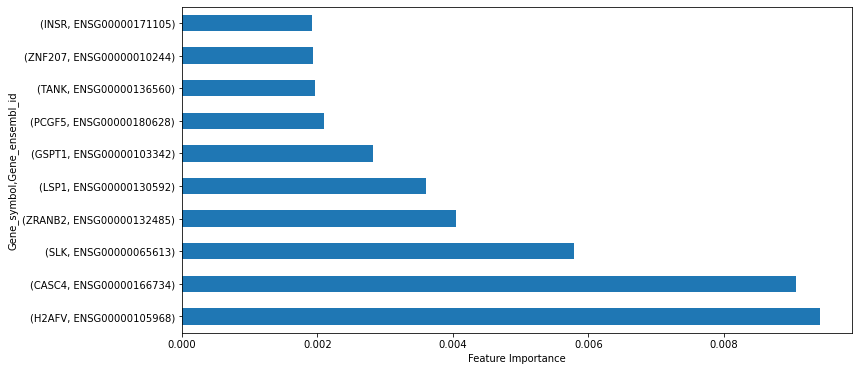

In [29]:
top_10_genes_iso = LR_model_features(X_develop_iso,y_develop_iso,best_params_iso,max_features=10)
top_10_genes_iso